In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset
import torch

/media/ssd/adversarial-manhole/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('..')

from adv_manhole.models import load_models, ModelType

[2024-05-27 19:01:21] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /home/naufal/sg_logs/console.log


In [3]:
# Load the dataset
carla_dataset = load_dataset("naufalso/carla_hd", cache_dir="./data/")
print(carla_dataset)

In [4]:
# Load MonoDepth2 model
monodepth2_model = load_models(ModelType.MDE, "mono_640x192")

# Load DDRNet model
ddrnet_model = load_models(ModelType.SS, "ddrnet_23")

DatasetDict({
    train: Dataset({
        features: ['rgb', 'raw_depth', 'normal', 'semantic', 'camera_config', 'town', 'location_idx', 'camera_idx'],
        num_rows: 1593
    })
    validation: Dataset({
        features: ['rgb', 'raw_depth', 'normal', 'semantic', 'camera_config', 'town', 'location_idx', 'camera_idx'],
        num_rows: 531
    })
    test: Dataset({
        features: ['rgb', 'raw_depth', 'normal', 'semantic', 'camera_config', 'town', 'location_idx', 'camera_idx'],
        num_rows: 532
    })
})


/media/ssd/adversarial-manhole/.conda/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/media/ssd/adversarial-manhole/.conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
[2024-05-27 19:01:28] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the cityscapes dataset, published under the 

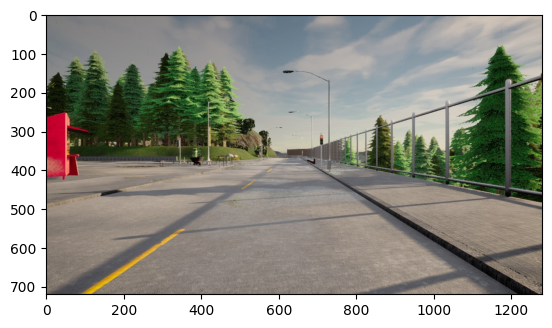

In [5]:
# Take a sample rgb image from training set
sample = carla_dataset['train'][0]['rgb']

# Plot the sample image
plt.imshow(sample)
plt.show()

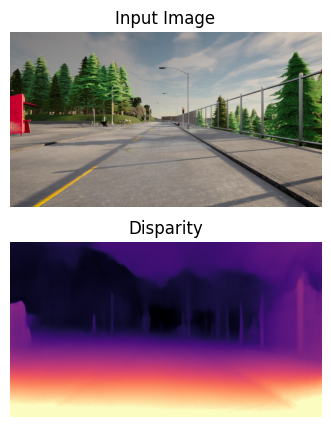

In [6]:
# Predict depth using MonoDepth2
depths = monodepth2_model(sample)

print("Depth shape: ", depths[0].shape)

# Plot the depth map
fig = monodepth2_model.plot(sample, depths[0])
plt.show()

/media/ssd/adversarial-manhole/.conda/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Depth shape:  torch.Size([1, 720, 1280])


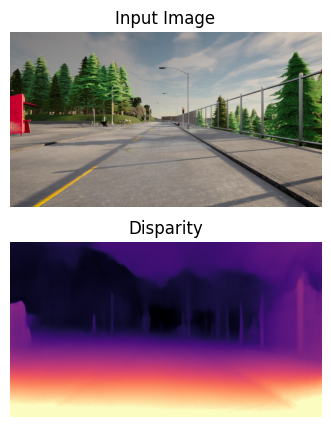

In [7]:
from torchvision.transforms import ToTensor

# Convert the image to tensor
tensor_img = ToTensor()(sample).unsqueeze(0)

# Predict depth using MonoDepth2
depths = monodepth2_model(tensor_img)

# Plot the depth map
fig = monodepth2_model.plot(sample, depths[0])
plt.show()

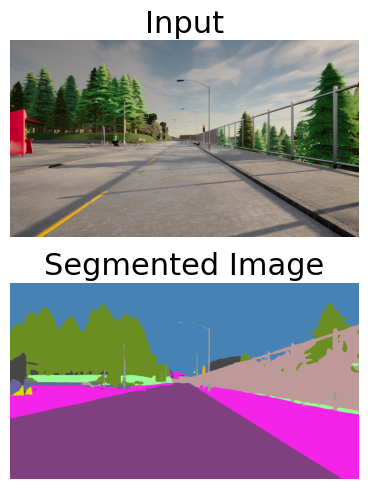

In [9]:
# Predict semantic segmentation using DDRNet
sem_seg = ddrnet_model(sample)

# Plot the semantic segmentation
fig = ddrnet_model.plot(sample, sem_seg[0])
plt.show()

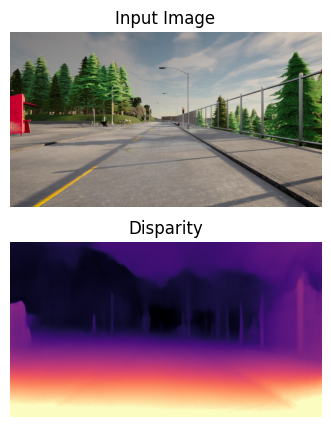

In [10]:
from torchvision.transforms import ToTensor

# Convert the image to tensor
tensor_img = ToTensor()(sample).unsqueeze(0)

# Predict depth using MonoDepth2
sem_seg = ddrnet_model(tensor_img)

# Plot the depth map
fig = monodepth2_model.plot(sample, depths[0])
plt.show()